# 量子测量与动态特征选择

[4.9](./4-9.ipynb) 中用GMPS的单点纠缠熵定义特征所含的信息量大小，从而刻画其重要程度，实现特征选择。显然，该方法仅考虑了用于训练GMPS样本特征的共性。但是在很多情况下，不同的样本所对应的不同特征是有区别的。例如，当我们在黑板上写字时，重要的特征应该是所写的字本身，那么重要的特征应取决于具体的书写，GMPS的单点纠缠熵显然是不能实现这点的。

本节内容：基于“量子系统冯诺伊曼熵的取值与测量算符的选择相关”这一基本原理，通过量子特征映射定义量子测量，计算该测量导致的生成式量子态单点纠缠熵的变化量，来刻画该测量获得的关于其他特征的信息增量，从而实现一种“动态”的特征选择。

关键概念：
* 背景 (Background)
* 信息区 (Informative Area)
* 关键性少数 (Critical Minority)

> 例子：考虑在黑板上进行书写：如果要求仅在黑板的中间某个子区域进行书写，那么对于所有样本，该子区域之外的像素值不会发生变化（黑色），这个区间被称为背景。有用的信息（文字）出现在中间进行书写的子区域，我们将其称之为信息区。文字笔画对应的位置，则被称为关键性少数

## 例子：移动的黑色像素

![moving_black_box_a](./images/moving_black_box_a.png)

> 由两张图像构成的数据集，每个图像仅包含三个像素，取值分别是“白、白、黑 (0,0,1)”与“白、黑、白 (0,1,0)”

![moving_black_box_b](./images/moving_black_box_b.png)
> 由三张图像构成的数据集，每个图像仅包含三个像素，取值分别是(0,0,0,1)、(0,0,1,0)与 (0,1,0,0)

* 第 0 号位置的像素取值不变，满足“背景”的定义
* 黑色像素在后两/三个位置移动，因此这两个位置应为信息区
* 黑色像素所在的位置应为关键性少数

对于(a)，懒惰态满足：$|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle(|01\rangle + |10\rangle)$

易得，单点纠缠熵满足：$S_0 = 0$（背景），$S_1 = S_2 = \ln2$（信息区）

对比MNIST数据集的单点纠缠熵：背景处于图像边缘，靠中心的位置为信息区

### 单点纠缠熵的变化量

依据具体像素取值对懒惰态进行投影测量，并计算单点纠缠熵的变化量

考虑对第 $l'$ 个量子位进行测量，测量前后单点纠缠熵的变化总量为

$$\langle\delta S\rangle(x_{l'}) = \sum_{i=0}^{L-1}(\tilde{S}_i - S_i)$$

其中，$x_{l'}$ 为测量第 $l'$ 个量子位的坍缩结果，$\tilde{S}_i$ 为测量后第 $i$ 个量子位的单点纠缠熵，$L$ 为量子比特数。

> 在物理实验中，因为量子坍塌不一定会产生 $x_{l'}$ 态，所以我们要做后选择，也就是制备多个量子态，选出塌缩成 $x_{l'}$ 的量子态继续实验

> 注：由于是投影测量，被测量的第$l'$个量子位的单点纠缠熵必变为0。

以图片 a 为例

![moving_black_box_a](./images/moving_black_box_a.png)

考虑对**位置0**的量子位进行投影测量：测量后无论得到什么样的坍缩结果，剩余两个比特位都构成一个2比特最大纠缠态 $\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$，测量后的单点纠缠熵仍为 $S'_0 = 0$ 与 $S'_1 = S'_2 = \ln2$，因此我们有 $\langle\delta S\rangle(x_0) = 0$。

考虑对**位置1**的量子位进行投影测量，坍缩结果为**0**(a 中第一张图)：剩余两个比特位都构成直积态 $|01\rangle$，测量后的单点纠缠熵为 $S'_0 = S'_1 = S'_2 = 0$，因此我们有 $\langle\delta S\rangle(x_0) = -2 \ln 2$。

考虑对**位置2**的量子位进行投影测量，坍缩结果为**1**(a 中第一张图)：剩余两个比特位都构成直积态 $|00\rangle$，测量后的单点纠缠熵为 $S'_0 = S'_1 = S'_2 = 0$，因此我们有 $\langle\delta S\rangle(x_0) = -2 \ln 2$。

讨论：虽然我们一开始认为黑色像素应该为关键性少数，但是对于第0号样本而言，白色像素 $x_1$ 与黑色像素 $x_2$ 得到的 $\langle\delta S\rangle(x_1)$ 相等，因此无法通过该量区分出关键性少数。这里的问题在于，在信息区内部，黑、白像素的数量相等，因此无法将黑色像素视作关键性少数。

以图片 b 为例

![moving_black_box_b](./images/moving_black_box_b.png)

懒惰态满足：$|\psi\rangle = \frac{1}{\sqrt{3}}|0\rangle(|001\rangle + |010\rangle + |100\rangle)$

单点纠缠熵：$S_0 = 0$ (背景)，$S_1 = S_2 = S_3 = \ln 3 - \frac{2}{3}\ln 2 \approx 0.6365$ (信息区)

考虑对位置0的量子位进行投影测量，坍缩结果为0：剩余三个比特位都构成直积态$\frac{1}{\sqrt{3}}(|001\rangle + |010\rangle + |100\rangle)$，测量后的单点纠缠熵显然不变，有$\langle\delta S\rangle(x_0) = 0$。

考虑对位置1或2的量子位进行投影测量，坍缩结果为0 (b 中第一张图)：其余3个量子位所处的态为$\frac{1}{\sqrt{2}}|0\rangle(|01\rangle + |10\rangle)$，单点纠缠熵分别为$S'_0 = 0$, $S'_2 = S'_3 = \ln 2$，因此有$\langle\delta S\rangle(x_1 = 0) = \langle\delta S\rangle(x_2 = 0) = 2\ln 2 - 3(\ln 3 - \frac{2}{3}\ln 2) = 4\ln 2 - 3\ln 3 \approx -0.5232$。

考虑对位置3的量子位进行投影测量，坍缩结果为1 (b 中第一张图)：其余3个量子位所处的态为$|000\rangle$，单点纠缠熵分别为$S'_0 = S'_1 = S'_2 = 0$，因此有$\langle\delta S\rangle(x_3 = 1) = 2\ln 2 - 3\ln 3 \approx -1.910$，变化量远大于位置1或2测量导致的变换量。

小结：
* 考虑后选择出第一张图的坍缩结果，有
  
  $\langle \delta S \rangle(x_0) = 0$ (背景)

  $\langle \delta S \rangle(x_1 = 0) = \langle \delta S \rangle(x_2 = 0) \approx -0.5232$ (信息区)

  $\langle \delta S \rangle(x_3 = 1) \approx -1.910$ (信息区中的关键性少数)

* 计算易得，对于该例子，在信息区中的任一位置的测量满足
  
  $\langle \delta S \rangle(x_l = 0) = 4 \ln 2 - 3 \ln 3 \approx -0.5232$

  $\langle \delta S \rangle(x_l = 1) = 2 \ln 2 - 3 \ln 3 \approx -1.910$

  黑色像素为关键性少数。
* $\langle\delta S\rangle(x_{l'})$ 在这三张图片中都能够识别出各自的背景、信息区以及关键性少数

### Code

In [1]:
# |default_exp algorithms.dyn_feature_selection_OEE
# |export
import torch
from tensor_network.feature_mapping import cossin_feature_map, feature_map_to_qubit_state
import numpy as np

In [2]:
from typing import List

In [3]:
# |export quantum_state.functional
from tensor_network.utils.checking import check_state_tensor
from tensor_network.quantum_state.functional import calc_reduced_density_matrix


def calc_onsite_entanglement_entropy(
    state: torch.Tensor, qubit_idx: int | List[int] | None = None, eps: float = 1e-14
) -> torch.Tensor:
    """
    Calculate the onsite entanglement entropy of a quantum state.
    Args:
        state: The quantum state to calculate the onsite entanglement entropy of.
        qubit_idx: The indices of the qubits to calculate the onsite entanglement entropy of. If None, all qubits are considered.
        eps: The small number to avoid log(0).
    Returns:
        The onsite entanglement entropy of the quantum state.
    """
    check_state_tensor(state)
    n_qubits = state.ndim
    if qubit_idx is None:
        qubit_idx = list(range(n_qubits))
    elif isinstance(qubit_idx, int):
        qubit_idx = [qubit_idx]
    else:
        assert isinstance(qubit_idx, List), (
            f"qubit_idx must be an integer or a list of integers, got {type(qubit_idx)}"
        )
        assert len(qubit_idx) > 0, "qubit_idx must be a non-empty list"
    qubit_idx = torch.tensor(qubit_idx)
    assert torch.all(qubit_idx < n_qubits), "qubit_idx must be less than the number of qubits"
    assert torch.all(qubit_idx >= 0), "qubit_idx must be non-negative"
    oees = []
    for idx in qubit_idx:
        rdm = calc_reduced_density_matrix(state, idx.item())
        eigvals = torch.linalg.eigvalsh(rdm)
        oees.append(-eigvals.inner(torch.log(eigvals + eps)))

    oees = torch.stack(oees)
    return oees


def project_state(
    state: torch.Tensor, project_qubit_state: torch.Tensor, project_qubit_idx: int
) -> torch.Tensor:
    """
    Project a quantum state onto a specific qubit state.
    Args:
        state: The quantum state to project.
        project_qubit_state: The state to project onto.
        project_qubit_idx: The index of the qubit to project onto.
    Returns:
        The projected quantum state.
    """
    check_state_tensor(state)
    assert project_qubit_state.ndim == 1 and project_qubit_state.shape[0] == 2, (
        "project_qubit_state must be a 1D tensor with 2 elements"
    )
    new_state = torch.tensordot(state, project_qubit_state, dims=([project_qubit_idx], [0]))
    new_state = new_state / new_state.norm()
    return new_state

In [4]:
# |export
from tensor_network.quantum_state.functional import calc_onsite_entanglement_entropy, project_state


def dyn_OEE_analyze(samples: torch.Tensor, nth_img: int):
    """
    dynamic onsite entanglement entropy analysis
    """
    assert samples.ndim == 2, "samples must be a 2D tensor"  # (num_samples, num_features)
    assert samples.shape[1] >= 3
    num_samples, num_features = samples.shape
    features = cossin_feature_map(samples, theta=0.5)  # (num_samples, num_features, 2)
    tensor_states = feature_map_to_qubit_state(features)  # (num_samples, [2] * num_features)
    tensor_state = tensor_states.sum(dim=0) / np.sqrt(num_samples)

    oees = calc_onsite_entanglement_entropy(tensor_state)
    print(f"初始OEE = {oees}")
    total_oee = oees.sum()

    for feature_idx in range(num_features):
        print(
            f"根据第{feature_idx}个样本的特征取值 (x={samples[nth_img, feature_idx]})，投影测量第{feature_idx}个量子位"
        )
        projected_state = project_state(
            tensor_state, features[nth_img, feature_idx, :], feature_idx
        )
        new_oees = calc_onsite_entanglement_entropy(projected_state)
        oee_change = new_oees.sum() - total_oee
        print(f"\t 测量后，其余量子位OEE = {new_oees}")
        print(f"\t 测量前后OEE变化量 = {oee_change.item()}")
    print()

In [5]:
simple_samples_a = torch.tensor([[0, 0, 1], [0, 1, 0]])
simple_samples_b = torch.tensor([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]])

In [6]:
dyn_OEE_analyze(simple_samples_a, 0)
dyn_OEE_analyze(simple_samples_b, 0)

初始OEE = tensor([5.9605e-08, 6.9315e-01, 6.9315e-01])
根据第0个样本的特征取值 (x=0)，投影测量第0个量子位
	 测量后，其余量子位OEE = tensor([0.6931, 0.6931])
	 测量前后OEE变化量 = 0.0
根据第1个样本的特征取值 (x=0)，投影测量第1个量子位
	 测量后，其余量子位OEE = tensor([-0., -0.])
	 测量前后OEE变化量 = -1.3862943649291992
根据第2个样本的特征取值 (x=1)，投影测量第2个量子位
	 测量后，其余量子位OEE = tensor([-0., -0.])
	 测量前后OEE变化量 = -1.3862943649291992

初始OEE = tensor([5.9605e-08, 6.3651e-01, 6.3651e-01, 6.3651e-01])
根据第0个样本的特征取值 (x=0)，投影测量第0个量子位
	 测量后，其余量子位OEE = tensor([0.6365, 0.6365, 0.6365])
	 测量前后OEE变化量 = -3.5762786865234375e-07
根据第1个样本的特征取值 (x=0)，投影测量第1个量子位
	 测量后，其余量子位OEE = tensor([5.9605e-08, 6.9315e-01, 6.9315e-01])
	 测量前后OEE变化量 = -0.5232481956481934
根据第2个样本的特征取值 (x=0)，投影测量第2个量子位
	 测量后，其余量子位OEE = tensor([5.9605e-08, 6.9315e-01, 6.9315e-01])
	 测量前后OEE变化量 = -0.5232481956481934
根据第3个样本的特征取值 (x=1)，投影测量第3个量子位
	 测量后，其余量子位OEE = tensor([-0., -0., -0.])
	 测量前后OEE变化量 = -1.9095425605773926



## 例子：MNIST + MPS

In [7]:
# |export

from tensor_network.mps.modules import MPS
from tqdm.auto import tqdm
from typing import Dict, Any


def _remove_at(tensor: torch.Tensor, idx: int) -> torch.Tensor:
    return torch.cat([tensor[:idx], tensor[idx + 1 :]])


def OEE_variation_one_qubit_measurement(
    mps: MPS,
    feature: torch.Tensor,
    oee_threshold: float | None = None,
    progress_bar_kwargs: Dict[str, Any] = {},
) -> torch.Tensor:
    assert feature.ndim == 2, "features must be a 2D tensor"
    feature_num = feature.shape[0]
    oees = mps.entanglement_entropy_onsite_()
    if oee_threshold is None:
        selected_pos = torch.arange(feature_num)
        select_all = True
    else:
        assert oee_threshold > 0.0, "oee_eps must be a positive number"
        lt_oee_eps = oees < oee_threshold
        oees[lt_oee_eps] = 0.0
        selected_pos = torch.nonzero(~lt_oee_eps, as_tuple=True)[0]
        select_all = False

    oee_sum = oees.sum()
    zero = torch.zeros_like(oee_sum)
    oee_changes = []

    for idx in tqdm(range(feature_num), **progress_bar_kwargs):
        if idx in selected_pos:
            mps.center_orthogonalization_(idx, mode="qr", normalize=False)
            # project mps at idx
            projected_mps = mps.project_one_qubit(idx, feature[idx])
            projected_mps._center = max(0, idx - 1)
            if select_all:
                new_oees = projected_mps.entanglement_entropy_onsite_()
            else:
                new_selected_pos = _remove_at(selected_pos, idx)
                new_selected_pos[new_selected_pos > idx] -= 1
                new_oees = projected_mps.entanglement_entropy_onsite_(
                    indices=new_selected_pos.tolist()
                )
            oee_changes.append(oee_sum - new_oees.sum())
        else:
            oee_changes.append(zero)

    oee_changes = torch.stack(oee_changes)
    return oee_changes

In [8]:
from tensor_network.utils.data import load_mnist_images
from time import time
import matplotlib.pyplot as plt

cache_path = "datasets/MNIST"
MNIST_NORMALIZE = False
COSSIN_THETA = 0.5

train_class = 0
test_device = torch.device("cpu")

In [9]:
sample_image = load_mnist_images(
    cache_path=cache_path,
    num=1,
    from_subset="train",
    shuffle=True,
    normalization=MNIST_NORMALIZE,
    classes=train_class,
    return_labels=False,
).reshape(28, 28)
sample = sample_image.reshape(1, -1)
sample = cossin_feature_map(sample, theta=COSSIN_THETA)  # (1, 28*28, 2)
sample = sample.squeeze()  # (28*28, 2)

In [10]:
mps_train_class = MPS.load_from_safetensors(
    f"datasets/mps/mnist_{train_class}_mps.safetensors", requires_grad=False
).to_(device=test_device)

In [11]:
start = time()
oee_changes = OEE_variation_one_qubit_measurement(mps_train_class, sample)
end = time()
used_time = end - start

start = time()
oee_changes_with_threshold = OEE_variation_one_qubit_measurement(
    mps_train_class, sample, oee_threshold=1e-2
)
end = time()
used_time_with_threshold = end - start

print(f"""
Time to calculate OEE changes: {used_time:.2f}s
Time to calculate OEE changes with filtering: {used_time_with_threshold:.2f}s
Time saving: {100 * (used_time - used_time_with_threshold) / used_time:.2f}%
""")

  0%|          | 0/784 [00:00<?, ?it/s]

  0%|          | 0/784 [00:00<?, ?it/s]


Time to calculate OEE changes: 184.39s
Time to calculate OEE changes with filtering: 79.04s
Time saving: 57.13%



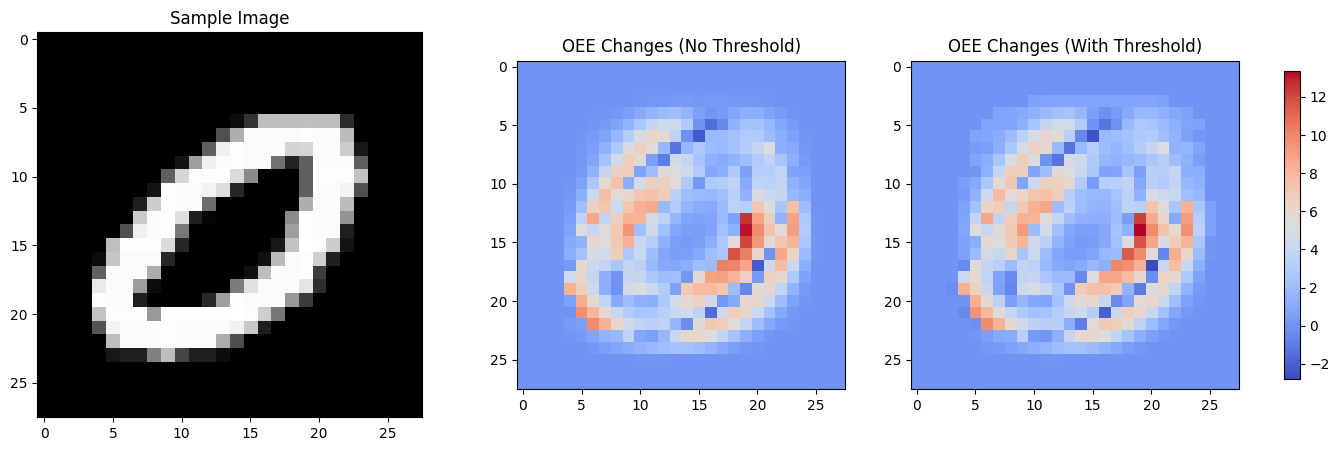

In [12]:
oee_change_image = oee_changes.reshape(28, 28)
oee_change_image_with_threshold = oee_changes_with_threshold.reshape(28, 28)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18, 5))

im0 = ax0.imshow(sample_image, cmap="gray", aspect="equal")
ax0.set_title("Sample Image")

# Plot the first image (without threshold)
im1 = ax1.imshow(oee_change_image, cmap="coolwarm", aspect="equal")
ax1.set_title("OEE Changes (No Threshold)")

# Plot the second image (with threshold)
im2 = ax2.imshow(oee_change_image_with_threshold, cmap="coolwarm", aspect="equal")
ax2.set_title("OEE Changes (With Threshold)")

# Add a single colorbar for both images
# Find the global min and max for consistent color scaling
vmin = min(oee_change_image.min(), oee_change_image_with_threshold.min())
vmax = max(oee_change_image.max(), oee_change_image_with_threshold.max())

# Update both images with the same color limits
im1.set_clim(vmin, vmax)
im2.set_clim(vmin, vmax)

# Add a single colorbar on the right side
plt.colorbar(im1, ax=[ax1, ax2], shrink=0.8)

plt.show()